In [2]:
from nilearn import plotting
from nilearn.input_data import NiftiMasker
import nibabel as nib
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!ls /data/templates/mni_icbm152_nlin_asym_09a

mni_icbm152_csf_tal_nlin_asym_09a.nii.gz
mni_icbm152_gm_tal_nlin_asym_09a.nii.gz
mni_icbm152_pd_tal_nlin_asym_09a.nii.gz
mni_icbm152_t1_tal_nlin_asym_09a.nii.gz
mni_icbm152_t1_tal_nlin_asym_09a_eye_mask.nii.gz
mni_icbm152_t1_tal_nlin_asym_09a_face_mask.nii.gz
mni_icbm152_t1_tal_nlin_asym_09a_mask.nii.gz
mni_icbm152_t2_tal_nlin_asym_09a.nii.gz
mni_icbm152_wm_tal_nlin_asym_09a.nii.gz


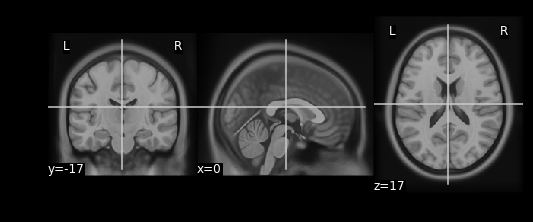

In [3]:
templ_img = '/data/templates/mni_icbm152_nlin_asym_09a/mni_icbm152_t1_tal_nlin_asym_09a.nii.gz'
mask_img = '/data/templates/mni_icbm152_nlin_asym_09a/mni_icbm152_t1_tal_nlin_asym_09a_mask.nii.gz'
plotting.plot_anat(templ_img)

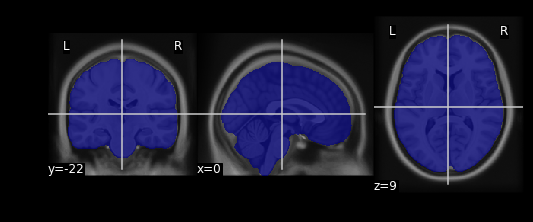

In [15]:
plotting.plot_roi(mask_img, bg_img=templ_img)

The following command should be run to dilate, but this doesn't work in docker (probably some permission error)

In [25]:
#!fslmaths mni_icbm152_t1_tal_nlin_asym_09a_mask.nii.gz -kernel box 4 -dilF mni_icbm152_t1_tal_nlin_asym_09a_mask_dil4.nii.gz

In [28]:
!ls /data/templates/mni_icbm152_nlin_asym_09a/

mni_icbm152_csf_tal_nlin_asym_09a.nii.gz
mni_icbm152_gm_tal_nlin_asym_09a.nii.gz
mni_icbm152_pd_tal_nlin_asym_09a.nii.gz
mni_icbm152_t1_tal_nlin_asym_09a.nii.gz
mni_icbm152_t1_tal_nlin_asym_09a_eye_mask.nii.gz
mni_icbm152_t1_tal_nlin_asym_09a_face_mask.nii.gz
mni_icbm152_t1_tal_nlin_asym_09a_mask.nii.gz
mni_icbm152_t1_tal_nlin_asym_09a_mask_dil4.nii.gz
mni_icbm152_t2_tal_nlin_asym_09a.nii.gz
mni_icbm152_wm_tal_nlin_asym_09a.nii.gz


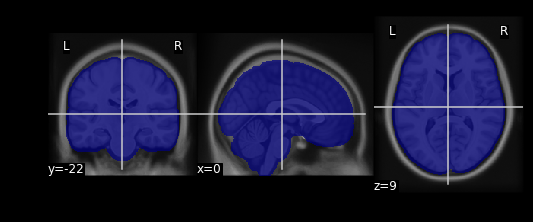

In [31]:
mask_dilated = '/data/templates/mni_icbm152_nlin_asym_09a/mni_icbm152_t1_tal_nlin_asym_09a_mask_dil4.nii.gz'
plotting.plot_roi(mask_dilated, bg_img=templ_img)

In [33]:
# masked image, command alos doesnt work in docker container
#!cd /data/templates && fslmaths 'mni_icbm152_t1_tal_nlin_asym_09a.nii.gz' -mas 'mni_icbm152_t1_tal_nlin_asym_09a_mask_dil4.nii.gz' 'mni_icbm152_t1_tal_nlin_asym_09a_brain_d4mm.nii.gz'

In [34]:
!ls /data/templates/mni_icbm152_nlin_asym_09a/

mni_icbm152_csf_tal_nlin_asym_09a.nii.gz
mni_icbm152_gm_tal_nlin_asym_09a.nii.gz
mni_icbm152_pd_tal_nlin_asym_09a.nii.gz
mni_icbm152_t1_tal_nlin_asym_09a.nii.gz
mni_icbm152_t1_tal_nlin_asym_09a_brain_d4mm.nii.gz
mni_icbm152_t1_tal_nlin_asym_09a_eye_mask.nii.gz
mni_icbm152_t1_tal_nlin_asym_09a_face_mask.nii.gz
mni_icbm152_t1_tal_nlin_asym_09a_mask.nii.gz
mni_icbm152_t1_tal_nlin_asym_09a_mask_dil4.nii.gz
mni_icbm152_t2_tal_nlin_asym_09a.nii.gz
mni_icbm152_wm_tal_nlin_asym_09a.nii.gz


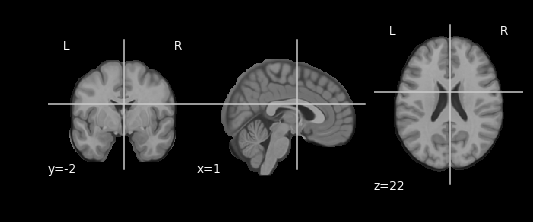

In [35]:
brain_img = '/data/templates/mni_icbm152_nlin_asym_09a/mni_icbm152_t1_tal_nlin_asym_09a_brain_d4mm.nii.gz'
plotting.plot_anat(brain_img)

In [ ]:
# For comparison

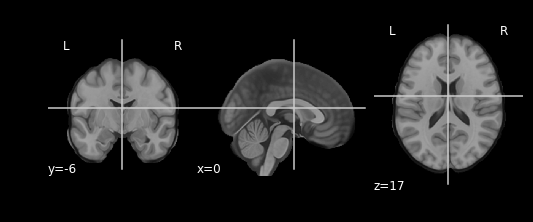

In [36]:
brain_img_p5mm = '/data/templates/mni_icbm152_t1_tal_nlin_asym_09b_hires_brain_d4mm.nii.gz'
plotting.plot_anat(brain_img_p5mm)

In [37]:
!cp /data/templates/mni_icbm152_nlin_asym_09a/mni_icbm152_t1_tal_nlin_asym_09a_brain_d4mm.nii.gz /data/templates

In [9]:
# finally, create brain img of the masked brain
masker = NiftiMasker(mask_img=mask_img)
X = masker.fit_transform(templ_img)
X = masker.inverse_transform(X)
nib.save(X, '/data/templates/mni_icbm152_t1_tal_nlin_asym_09a_brain.nii.gz')

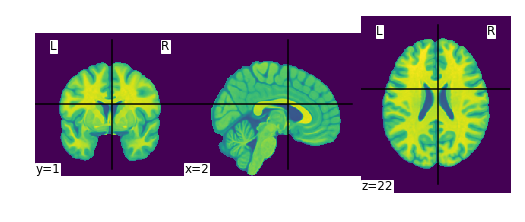